### KNN applied to the initial CWRU signals (before data augmentation).

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import matplotlib.patches as mpatches
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

In [2]:
df_completo = pd.read_csv("./Data/EstadisticosSeñalesInicialesCWRU.csv" , sep = ',')

In [3]:
X = df_completo[['Kurtosis', 'Impulse factor', 'RMS', 'Margin factor', 'Skewness',
               'Shape factor', 'Peak to peak', 'Crest factor']].values
y = df_completo['Tipo'].values

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, train_size = 0.75, random_state=0, stratify = y)
scaler = MinMaxScaler()
# Escalamos los predictores:
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

----- k: 1----- Accuracy test: 0.8571428571428571-----
----- k: 2----- Accuracy test: 0.8571428571428571-----
----- k: 3----- Accuracy test: 0.8571428571428571-----
----- k: 4----- Accuracy test: 0.5714285714285714-----
----- k: 5----- Accuracy test: 0.5714285714285714-----
----- k: 6----- Accuracy test: 0.42857142857142855-----
----- k: 7----- Accuracy test: 0.42857142857142855-----
----- k: 8----- Accuracy test: 0.42857142857142855-----
----- k: 9----- Accuracy test: 0.42857142857142855-----
----- k: 10----- Accuracy test: 0.42857142857142855-----
----- k: 11----- Accuracy test: 0.42857142857142855-----
----- k: 12----- Accuracy test: 0.42857142857142855-----
----- k: 13----- Accuracy test: 0.2857142857142857-----
----- k: 14----- Accuracy test: 0.2857142857142857-----
----- k: 15----- Accuracy test: 0.2857142857142857-----
----- k: 16----- Accuracy test: 0.42857142857142855-----
----- k: 17----- Accuracy test: 0.5714285714285714-----
----- k: 18----- Accuracy test: 0.571428571428571

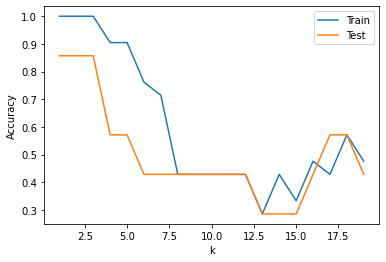

In [5]:
k_values = range(1, 20)
scores_train = []
scores_test = []
for k in k_values:
    knn = KNeighborsClassifier(n_neighbors = k)
    knn.fit(X_train, y_train)
    scores_train.append(knn.score(X_train, y_train))
    scores_test.append(knn.score(X_test, y_test))
    print('----- k: ' + str(k) + '----- Accuracy test: ' + str(scores_test[k - 1]) + '-----')
plt.figure()
plt.xlabel('k')
plt.ylabel('Accuracy')
plt.plot(k_values, scores_train, label = 'Train')
plt.plot(k_values, scores_test, label = 'Test')
plt.legend()

In [6]:
n_neighbors = 2
classifier = KNeighborsClassifier(n_neighbors)
classifier.fit(X_train, y_train)
print('Accuracy en el conjunto de train: {:.3f}'
     .format(classifier.score(X_train, y_train)))
print('Accuracy en el conjunto de test: {:.3f}'
     .format(classifier.score(X_test, y_test)))

Accuracy en el conjunto de train: 1.000
Accuracy en el conjunto de test: 0.857


In [7]:
pred = classifier.predict(X_test)
print(confusion_matrix(y_test, pred))
print(classification_report(y_test, pred))

[[3 0 0]
 [0 3 0]
 [0 1 0]]
              precision    recall  f1-score   support

       Inner       1.00      1.00      1.00         3
       Outer       0.75      1.00      0.86         3
        Sano       0.00      0.00      0.00         1

    accuracy                           0.86         7
   macro avg       0.58      0.67      0.62         7
weighted avg       0.75      0.86      0.80         7



C:\Users\jspardo\Miniconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [8]:
pred_train = classifier.predict(X_train)
print(confusion_matrix(y_train, pred_train))
print(classification_report(y_train, pred_train))

[[9 0 0]
 [0 9 0]
 [0 0 3]]
              precision    recall  f1-score   support

       Inner       1.00      1.00      1.00         9
       Outer       1.00      1.00      1.00         9
        Sano       1.00      1.00      1.00         3

    accuracy                           1.00        21
   macro avg       1.00      1.00      1.00        21
weighted avg       1.00      1.00      1.00        21

